# Items to Remember:


1.   Communicate using MS Teams
2.   Course main Github website: https://byui-cse.github.io/cse450-course/
3.   3 Team Module Deliverables: Executive Summary, Team Video, Holdout Set Predictions
4.   Resubmitting Holdout Set Predictions
5.   Mini Holdout Set
6.   Reflection and Personal Contribution


# Module 1 Review

1. Preprocess Data
2. Train/Test Split Data
3. Model -> Fit -> Predict
4. Evaluate Performance



## Titanic Dataset Info: 
### Features

1. Survival - Survival (0 = No; 1 = Yes)
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. SibSp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## 1. Preprocess Data

* Import the Data
* Evaluate the quality
* Address quality issues
* Feature engineering


In [ ]:
# Import dependencies and data
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Use .info() method to get an understanding of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
# Use .isna().sum() to count the total number of null values in each column
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Creating partial data quality report with .describe(include = 'all')
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Viewing cardinality with .nunique()
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

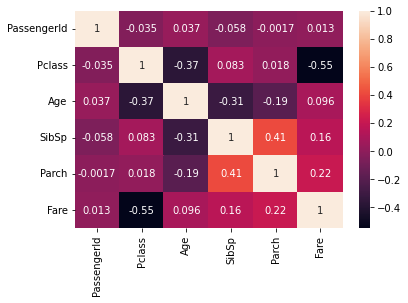

In [ ]:
# Viewing the correlation between features
corrMatrix = titanic.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
# Identify features
features_target = ['Pclass', 'Sex', 'Age', 'Embarked','Survived']
titanic_features_target = titanic[features_target]
titanic_features_target.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,No
1,1,female,38.0,C,Yes
2,3,female,26.0,S,Yes
3,1,female,35.0,S,Yes
4,3,male,35.0,S,No


In [ ]:
# Identify null values
titanic_features_target.isna().sum()

Pclass        0
Sex           0
Age         177
Embarked      2
Survived      0
dtype: int64

In [ ]:
# Remove null values and check for null values
titanic_features_target = titanic_features_target.dropna()
titanic_features_target.isna().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [ ]:
# Create feature set and target set
y = titanic_features_target['Survived']
X = titanic_features_target.drop(columns = 'Survived')
X.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [ ]:
# Feature engineering - One-Hot Encoding, watch out for the "Dummy Variable Trap"
X = pd.get_dummies(X, drop_first= True)
X.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1
1,1,38.0,0,0,0
2,3,26.0,0,0,1
3,1,35.0,0,0,1
4,3,35.0,1,0,1


## 2. Train/Test Split

*   Create a holdout set by spliting the X and y sets into training and test sets
*   Normalize or Standardize the x train and test sets 

In [ ]:
# Split X and y sets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Use StandardScaler() to normolize data around a mean of 0
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_test_scaled)

[[-1.44054799 -0.998795   -1.38285238 -0.20982173  0.56343617]
 [ 0.91929707  0.35228448 -1.38285238 -0.20982173  0.56343617]
 [ 0.91929707 -0.12059334  0.72314299 -0.20982173  0.56343617]
 ...
 [-0.26062546 -0.79613307  0.72314299 -0.20982173  0.56343617]
 [-0.26062546  1.09537819  0.72314299 -0.20982173  0.56343617]
 [ 0.91929707  2.37890369  0.72314299  4.76595066 -1.77482393]]


### K Nearest Neighbors (KNN)
KNN is a classifier that makes predictions based on neighboring data points. It first finds the number of k neighbors with the shortest distance. Then counts each class for those k neighbors and makes a prediction based on the class with the highest count.

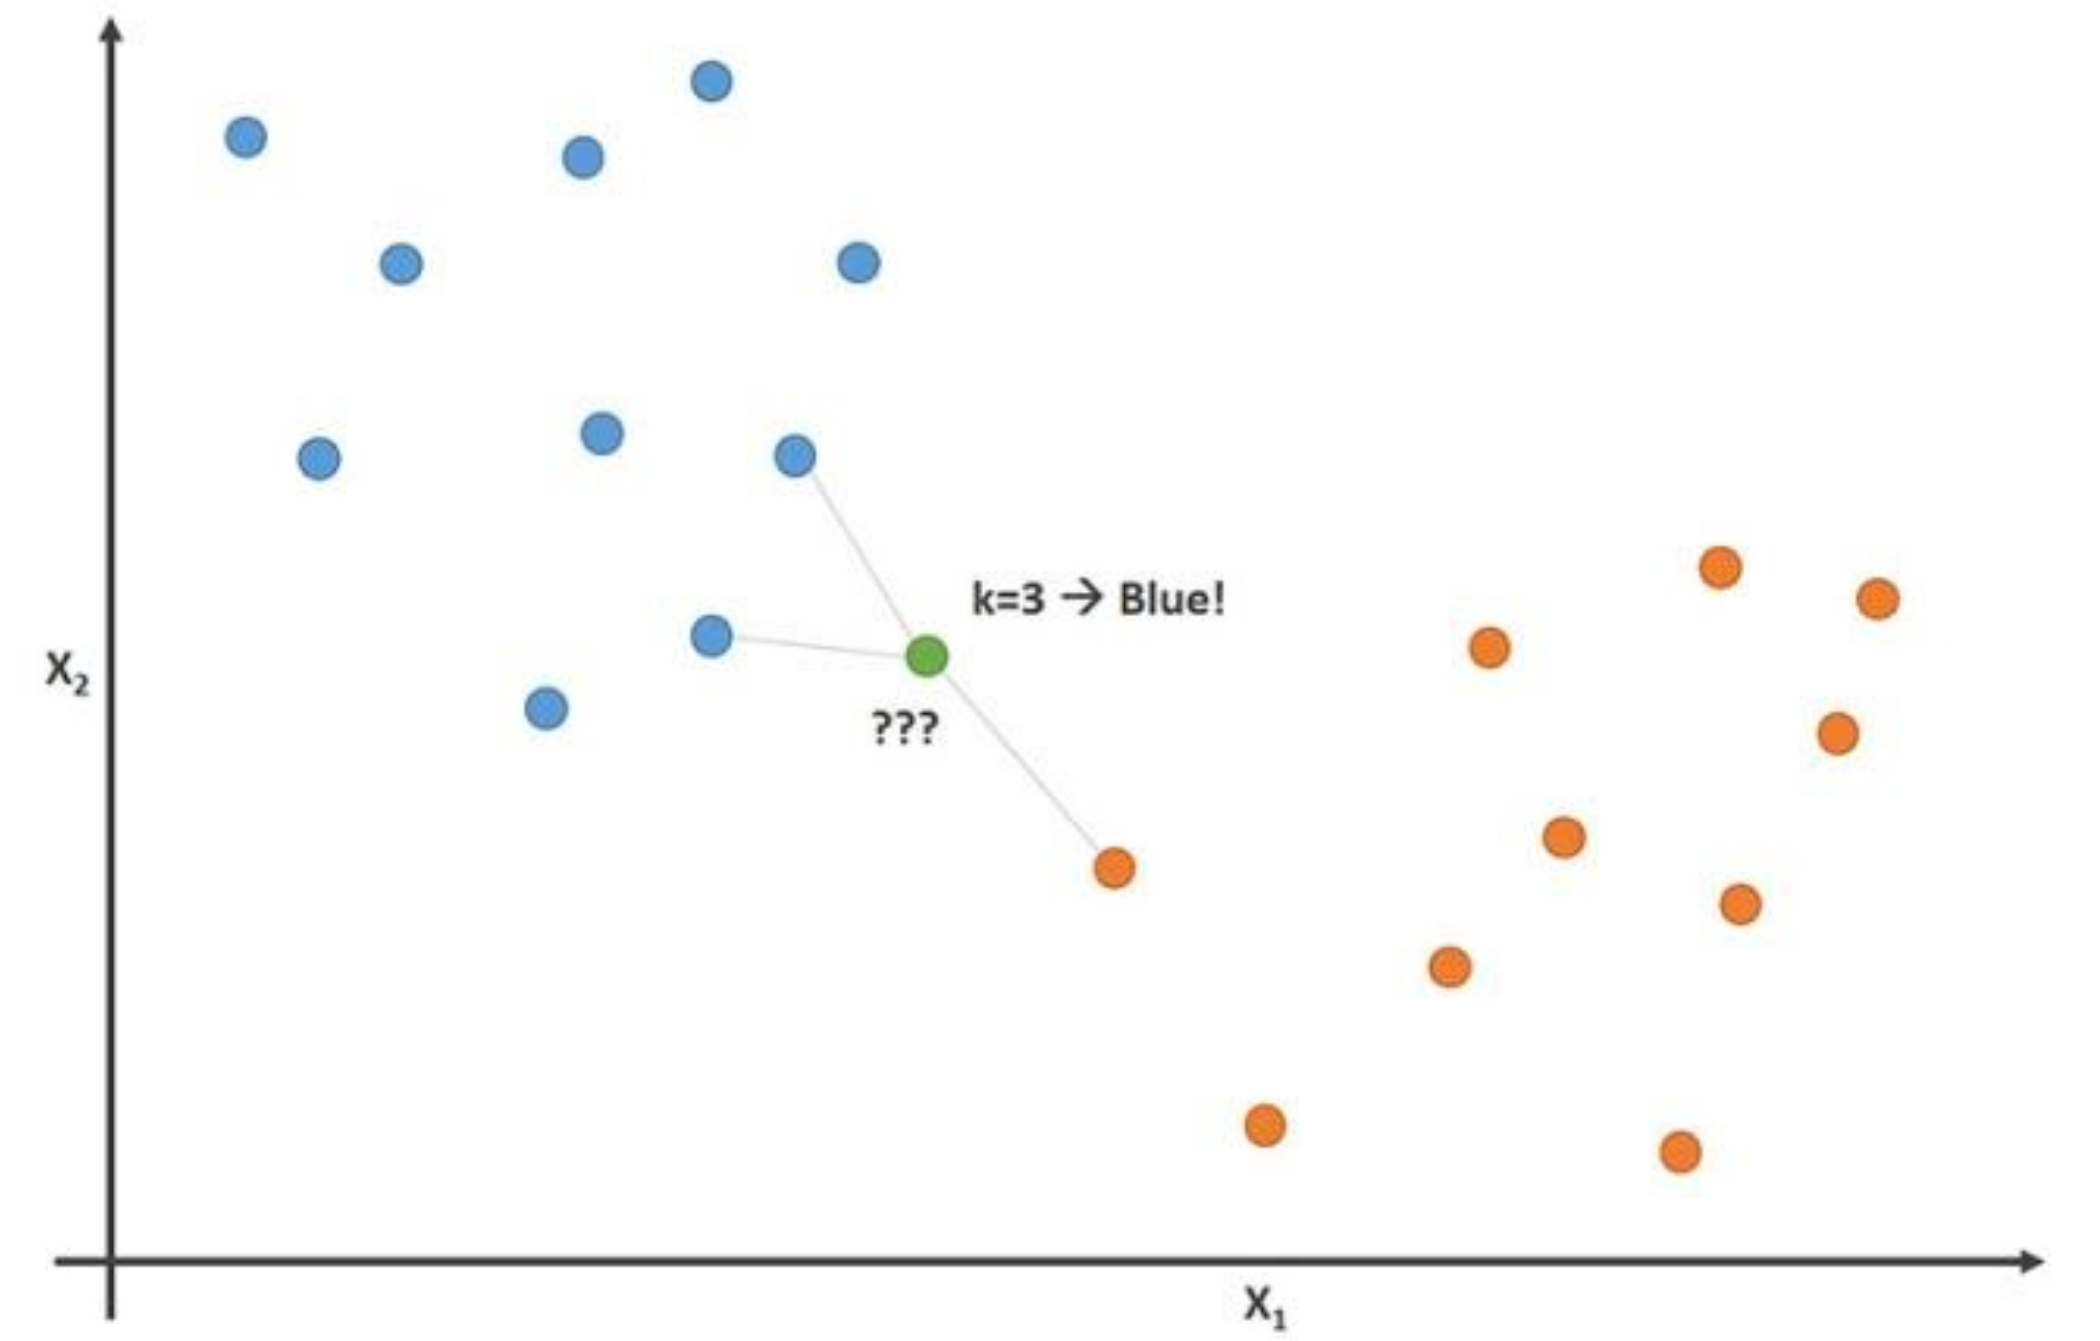

In [ ]:
# Build the KNN model
KNNclf = KNeighborsClassifier(n_neighbors = 3)

# Train or Fit the KNN model
KNNclf.fit(X_train_scaled, y_train)

# Make predictions on the x_test set using the trained model
KNNtest_predictions = KNNclf.predict(X_test_scaled)

In [ ]:
# Evaluate the model accuracy
accuracy_score(y_test, KNNtest_predictions)

0.794392523364486

In [ ]:
# Data has a small imbalance
y_train.value_counts()

No     298
Yes    200
Name: Survived, dtype: int64

## 4. Evalutate Performance
What is a confusion matrix?

A confusion matrix is a table used to describe the performance of the model. It highlights differences in the number of samples predicted to belong to a specific class, with the actual number of samples that do belong to that class.


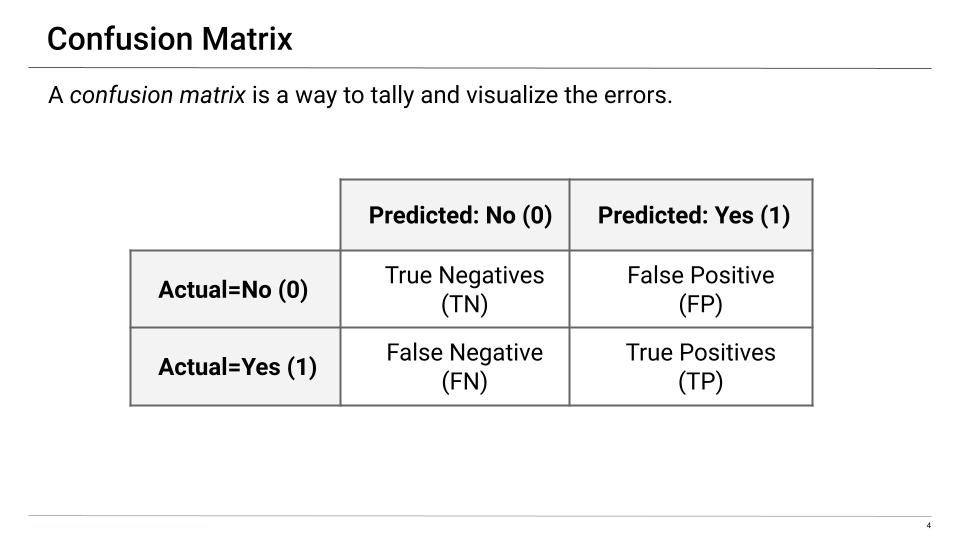



In [ ]:
# Display confusion matrix
confusion_matrix(y_test,KNNtest_predictions)

array([[104,  22],
       [ 22,  66]])

### What is a classification report?

It is a report that details the precision, recall, and accuracy of the predicted data points for each categorical class. A classification report can be used to determine the rate of false positives, false negatives, and the quality of the predictions.

***Precision***: is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision shows low false positives. TP / (TP + FP)

***Recall or Sensitivity***: is the ratio of correctly predicted positive observations to total actual positive observations. High recall shows low false negatives. TP / (TP + FN)

***Specificity***: is the ratio of correctly predicted negative observations to total actual negative observations. TN / (TN + FP)

***Accuracy***: how often the model is correct—the ratio of correctly predicted observations to the total number of observations. (TP + TN) / (TP + TN + FP + FN)

***F1-score***: is a weighted harmonic mean of precision and recall. 2*(Recall * Precision) / (Recall + Precision)

***Support***: is the number of occurence of the given class in your measured dataset.

***Macro-Avg***: simple mean of the scores.

***Weighted-Avg***: average that factors in the count for each class.

In [ ]:
# Display classification report
print(classification_report(y_test,KNNtest_predictions))

              precision    recall  f1-score   support

          No       0.83      0.83      0.83       126
         Yes       0.75      0.75      0.75        88

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.79      0.79      0.79       214



# Module 01 Bonus


## Resampling Methods
***Oversampling***: is the process of creating more instances of a class label, the smaller class.
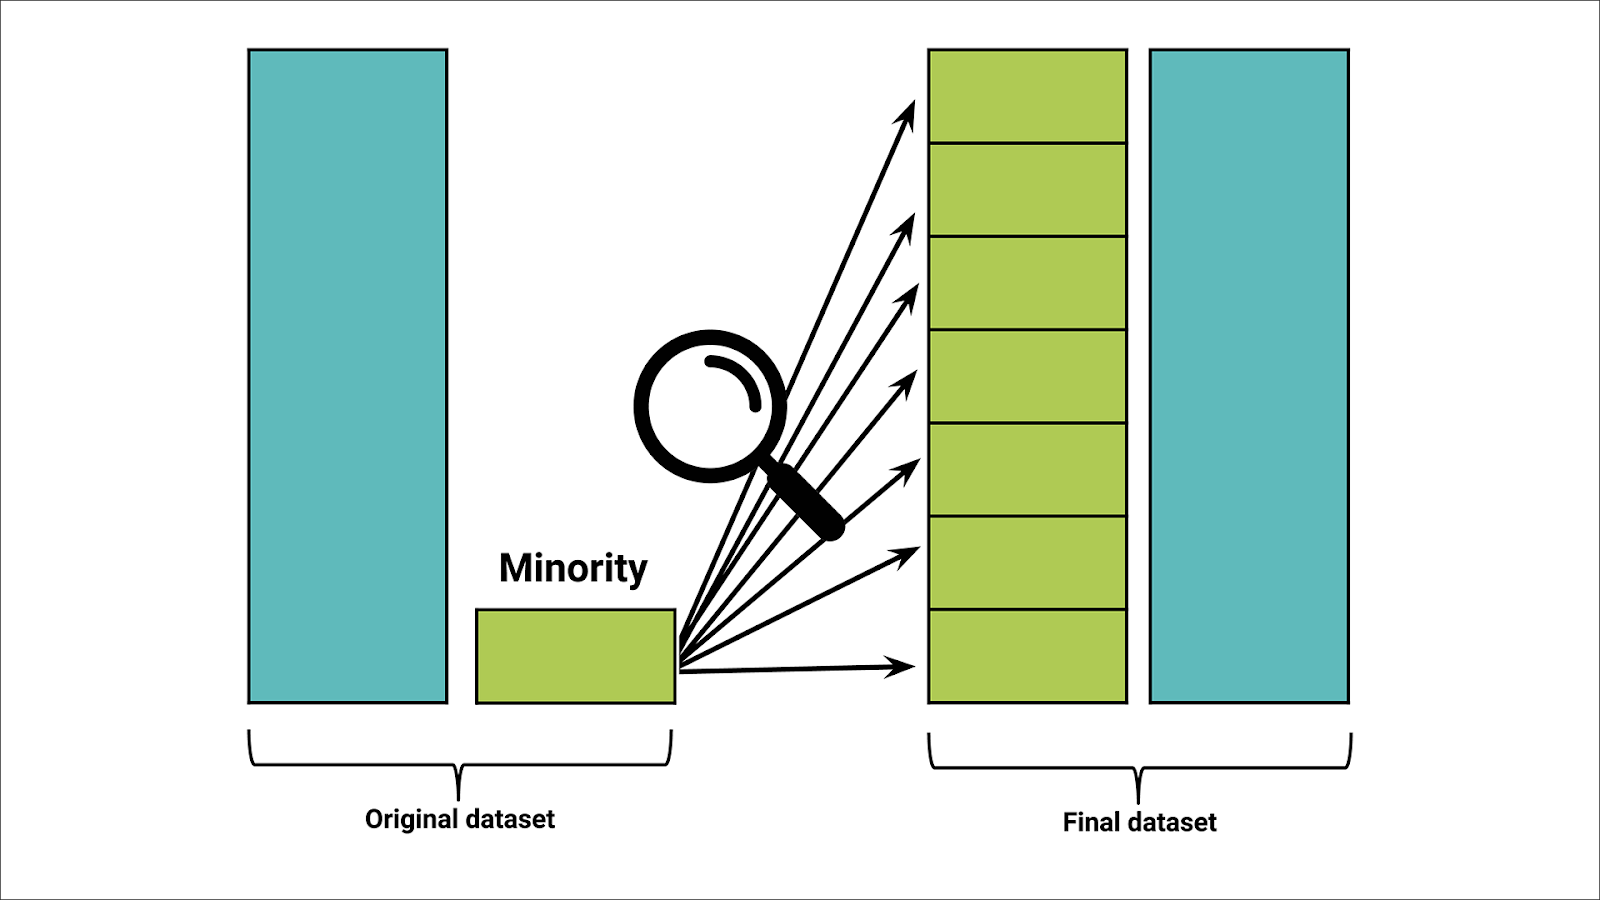

***Undersampling***: is the process of creating fewer instances of a class label, the larger class. 
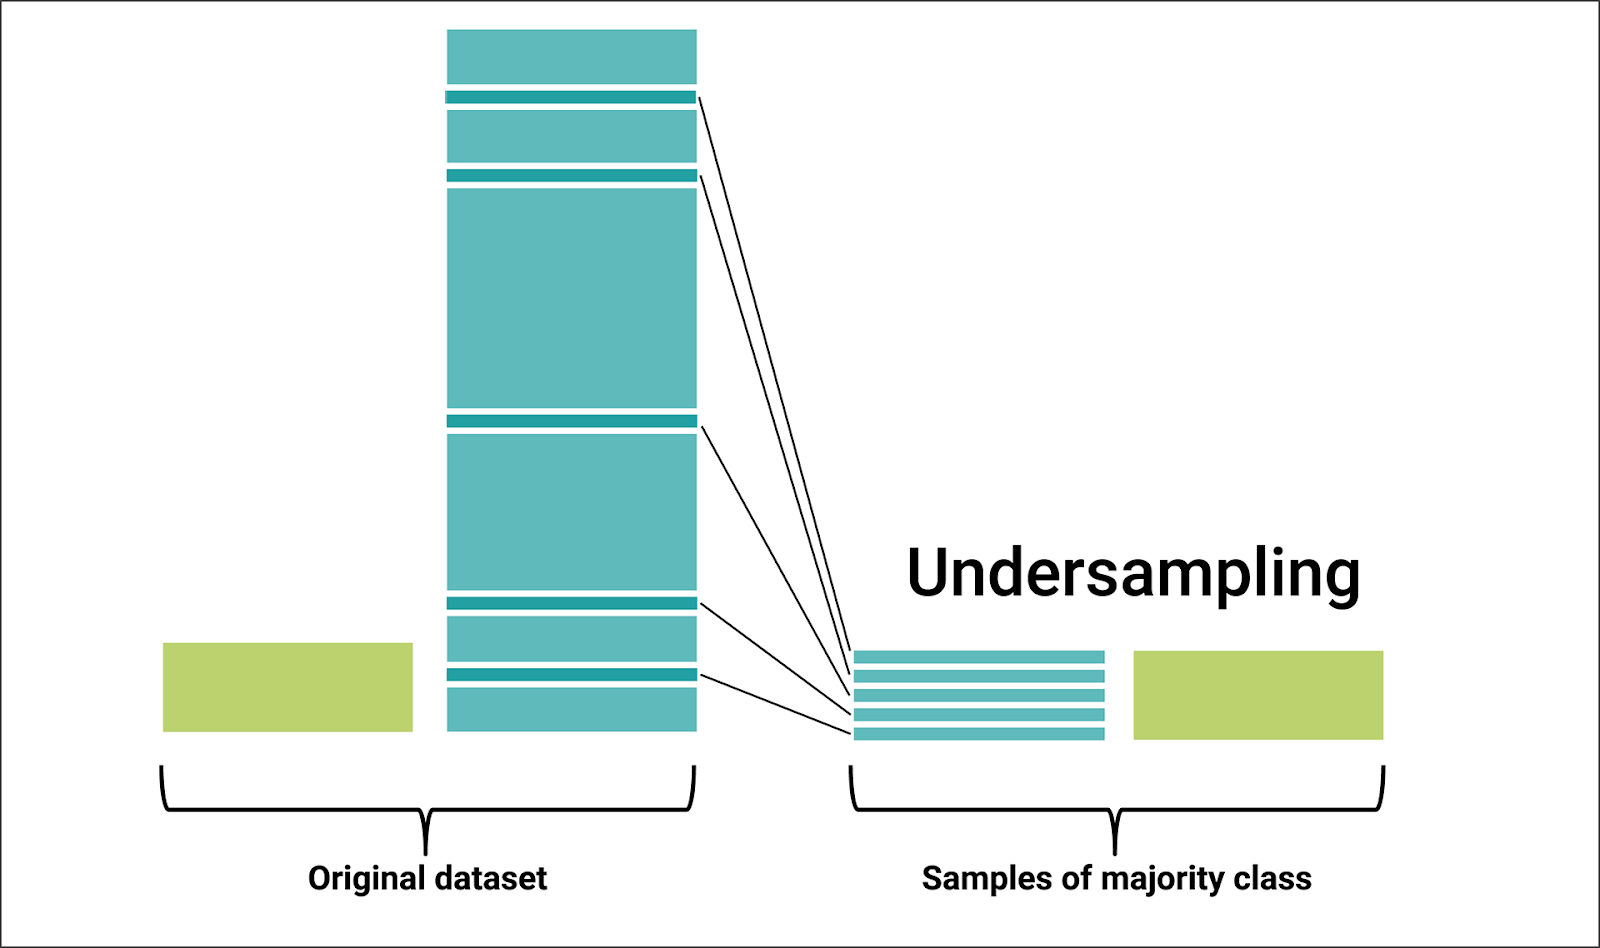

## Random Undersampling

In [ ]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the resampler model
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
# Count distinct values
y_resampled.value_counts()

No     200
Yes    200
Name: Survived, dtype: int64

In [ ]:
# Build the resampled KNN model
KNNclf_resampled = KNeighborsClassifier(n_neighbors = 3)

# Train or Fit the KNN model
KNNclf_resampled.fit(X_resampled, y_resampled)

# Make predictions using the model based on the resampled data
KNN_pred_resampled = KNNclf_resampled.predict(X_test_scaled)

In [ ]:
# Evaluate the model accuracy
accuracy_score(y_test, KNN_pred_resampled)

0.7990654205607477

## Random Oversampling

In [ ]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the resampler model
X_oversampler, y_oversampler = random_oversampler.fit_resample(X_train_scaled, y_train)

In [ ]:
# Count distinct values
y_oversampler.value_counts()

No     298
Yes    298
Name: Survived, dtype: int64

In [ ]:
# Build the resampled KNN model
KNNclf_overesampled = KNeighborsClassifier(n_neighbors = 3)

# Train or Fit the KNN model
KNNclf_overesampled.fit(X_oversampler, y_oversampler)

# Make predictions using the model based on the resampled data
KNN_pred_oversampled = KNNclf_overesampled.predict(X_test_scaled)

In [ ]:
# Evaluate the model accuracy
print(f'Original model: {accuracy_score(y_test, KNNtest_predictions)}')
print(f'Undersampling method: {accuracy_score(y_test, KNN_pred_resampled)}')
print(f'Oversampling method: {accuracy_score(y_test, KNN_pred_oversampled)}')

Original model: 0.794392523364486
Undersampling method: 0.7990654205607477
Oversampling method: 0.7710280373831776


# Module 02 Introduction


## Decision Trees
Tree-based algorithms are supervised learning methods that are mostly used for classifications and regression problems. The decision logic can be traced throughout each step of the model to see how the model reached the final prediction.

There are some key concepts that are important to know when working with decision trees:

* Root Node: A node that is divided into two or more homogeneous sets and represents the entire population or sample data.
* Parent Node: A node that is divided into sub-nodes.
* Child Node: Sub-nodes of a parent node.
* Decision Node: A sub-node that is split into further sub-nodes.
* Leaf or Terminal Node: Nodes that do not split.
* Branch or Sub-Tree: A subsection of the entire tree.
* Splitting: The process of dividing a node into two or more sub-nodes.
* Pruning: The process of removing sub-nodes of a decision node.
* Tree's Depth: The number of decision nodes encountered before making a decision.

In [ ]:
# Build the decision tree model
treeclf = DecisionTreeClassifier()

# Train or Fit the decision tree model
treeclf.fit(X_train_scaled, y_train)

# Make predictions on the x_test set using the trained model
treetest_predictions = treeclf.predict(X_test_scaled)

In [ ]:
# Display confusion matrix
confusion_matrix(y_test,treetest_predictions)

array([[103,  23],
       [ 25,  63]])

In [ ]:
# Display classification report
print(classification_report(y_test,treetest_predictions))

              precision    recall  f1-score   support

          No       0.80      0.82      0.81       126
         Yes       0.73      0.72      0.72        88

    accuracy                           0.78       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.78      0.78      0.78       214



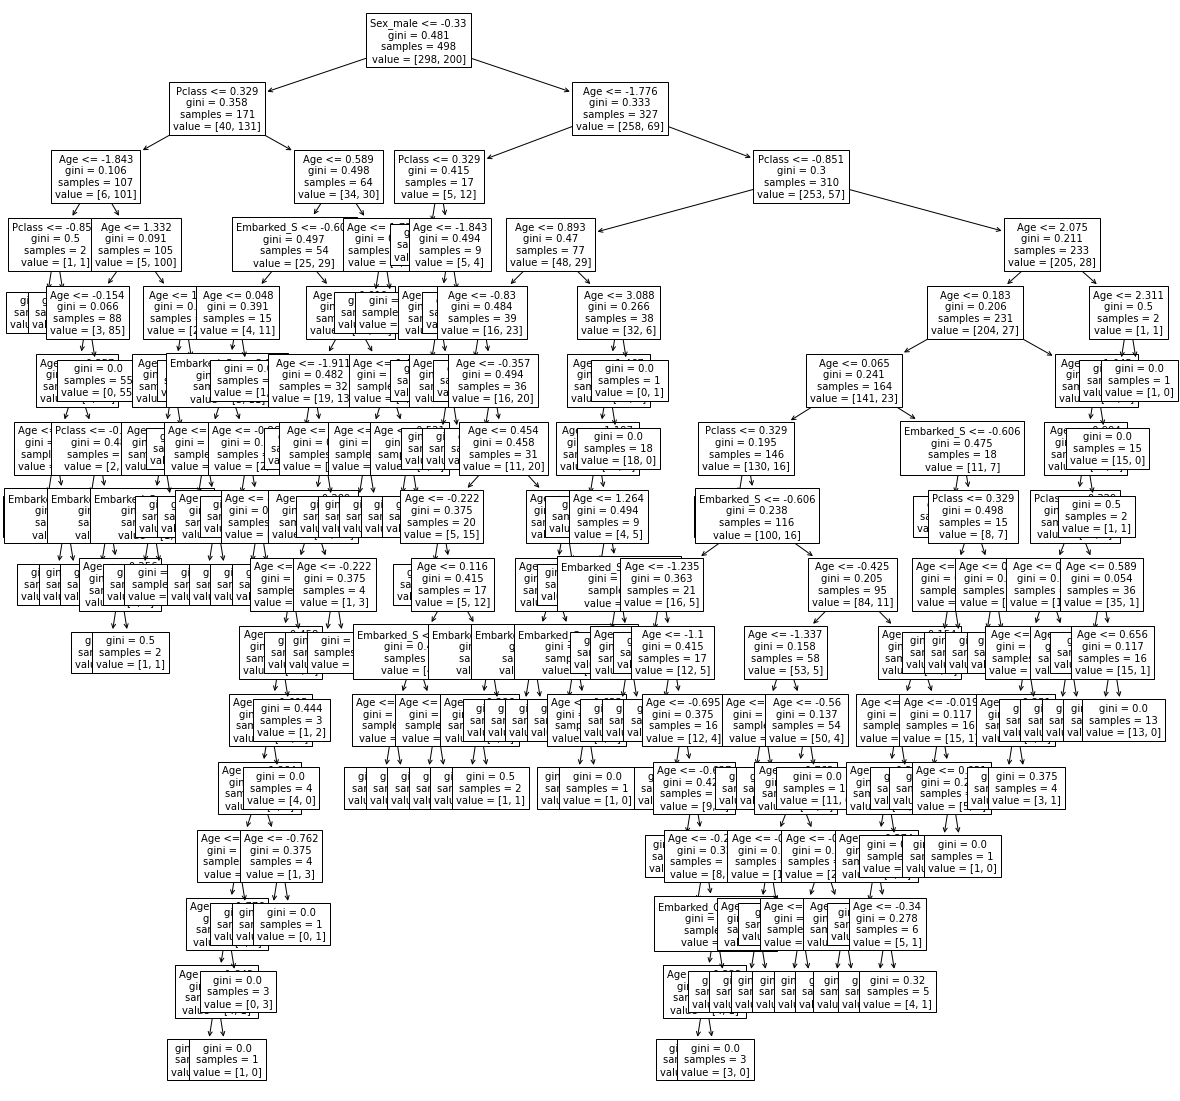

In [ ]:
# Let's visualize the tree

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(treeclf, fontsize=10, feature_names=X.columns)
plt.show()